<a href="https://colab.research.google.com/github/Jialan8020/CoronavirusProject/blob/master/Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 6
##Jialan Ma

**R markdown**
* *Question 1*

  The optimal `mu` is `1.48`
* *Question 2*

  `beta0 = -0.46`

  `beta1 = 0.076`

  Coefficients:
            
              Estimate Std. Error    t value Pr(>|t|)    

  Intercept 
              -4.643e-01  3.854e-17 -1.205e+16   <2e-16 

  bmi         
              7.649e-02  1.347e-18  5.679e+16   <2e-16 


* *Question 3*

  When `bmi = 30`, `predicted rdi = 5.24`

* *Question 4*

  The mean `mu` is the value that minimizes the squares difference (the sum of the distances between true x values and `mu`)

  The intercept is the value of rdi when bmi is equal to 0
  


**Python**

* *Question 1*

  `beta0 = -0.48`

  `beta1 = 0.077`

  LinregressResult:
  
  `slope=0.07715632915480321`

  `intercept=-0.4874336795088414`

  `rvalue=0.3718428920438583`

  `pvalue=4.56263973277768e-142`
  
  `stderr=0.002927890124634982`

* *Question 2*

  When `bmi = 30`, `predicted rdi = 5.24`

In [0]:
import numpy as np
from scipy import stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
sns.set()

In [58]:
data = pd.read_csv("shhs1.txt", sep = "\t")
df = data[["rdi4p", "bmi_s1"]]
df

,rdi4p,bmi_s1
0,1.438083,21.777553
1,17.802198,32.950680
2,4.853556,24.114150
3,0.797342,20.185185
4,2.756757,23.309053
...,...,...
5799,34.415781,25.693134
5800,13.653603,26.730372
5801,2.163462,24.228571
5802,1.038319,25.374483


beta0 and beta1 are: 
[-0.5380451982920762, 0.07953451812708455]
Predicted rdi when bmi = 30 is: 
5.347051316947273


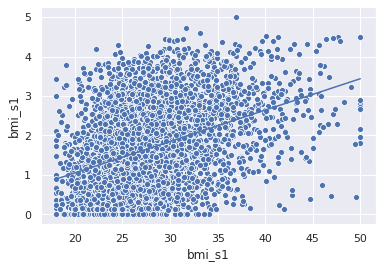

In [59]:
x = df["bmi_s1"]
y = df["rdi4p"]
# Fill NA values with mean value of the rest of the data
x = x.fillna(x.mean())
y = y.fillna(y.mean())
trainFraction = 0.75

# Hold out data
sample = np.random.uniform(size = len(x)) < trainFraction
xtrain = x[ sample]
ytrain = y[ sample]
ytrain_log = np.log(ytrain + 1)
xtest =  x[~sample]
ytest =  y[~sample]
ytest_log = np.log(ytest + 1)


# get the slope on the training data
beta1_log = st.pearsonr(xtrain, ytrain_log)[0] * np.std(ytrain_log) / np.std(xtrain)
beta0_log = np.mean(ytrain_log) - np.mean(xtrain) * beta1_log
print("beta0 and beta1 are: ")
print([beta0_log, beta1_log])

sns.scatterplot(xtrain, ytrain_log)
## add a line
sns.lineplot(xtrain, beta0_log + beta1_log * xtrain)

# predict rdi when bmi = 30
bmi30 = 30
predict_30_log = beta0_log + beta1_log * bmi30
predict_30 = np.exp(predict_30_log) - 1
print("Predicted rdi when bmi = 30 is: ")
print(predict_30)

In [60]:
print("Coefficients summary: ")
print(st.linregress(x = xtrain, y = ytrain_log))


Coefficients summary: 
LinregressResult(slope=0.07953451812708427, intercept=-0.5380451982920698, rvalue=0.37918159176043775, pvalue=1.113389778263744e-148, stderr=0.002944465955927768)
